In [ ]:
import glob
import os
import numpy as np
import pandas as pd
import random
import itertools
import matplotlib.pyplot as plt

from healthcareai_toolkit.clients import MedImageInsightClient
from healthcareai_toolkit import settings

In [4]:
N = 1

data_dir = settings.DATA_ROOT

files = list(glob.glob(data_dir + "**/*.*", recursive=True))
files = [f for f in files if os.path.isfile(f)]
files_dict = {
    k: list(v) for k, v in itertools.groupby(files, lambda x: x.split(".")[-1])
}

print(files_dict.keys())
files = sum([files_dict[k][:N] for k in ["jpg", "dcm", "png", "jpeg"]], [])

files

dict_keys(['jpg', 'png', 'dcm', 'gz', 'jpeg', 'csv', 'json', 'pkl', 'jsonl'])


['/home/azureuser/data/healthcare-ai/cxrreportgen-images/cxr_lateral.jpg',
 '/home/azureuser/data/healthcare-ai/medimageinsight-classification/images/1.3.6.1.4.1.55648.039545418410618636511900346832466593728.1.1.green.dcm',
 '/home/azureuser/data/healthcare-ai/medimageinsight-outlier-detection/samples/ref/CT/1.3.6.1.4.1.55648.212961843974261926001843069519334565702/1.3.6.1.4.1.55648.212961843974261926001843069519334565702.3.png',
 '/home/azureuser/data/healthcare-ai/segmentation-examples/144DME_as_F.jpeg']

In [ ]:
client = MedImageInsightClient(settings.MI2_MODEL_ENDPOINT)

Using ml_client base_url 1: https://management.azure.com
Using ml_client base_url 2: https://management.azure.com


In [6]:
images = files
np_img = client.read_to_image_array(
    os.path.join(
        data_dir,
        "medimageinsight-classification/images/1.3.6.1.4.1.55648.020128023405162813637635556625961837376.1002.1002.green.dcm",
    )
)
np_img2 = client.read_to_image_array(
    os.path.join(data_dir, "cxrreportgen-images/cxr_lateral.jpg")
)

images.append(np_img)
images.append(np_img2)

print(np_img.dtype, np_img2.dtype)

float32 uint8


GDCMImageIO (0x36ba1d0): Converting from MONOCHROME1 to MONOCHROME2 may impact the meaning of DICOM attributes related to pixel values.



In [ ]:
result = client.submit(image_list=images)

GDCMImageIO (0x34a9120): Converting from MONOCHROME1 to MONOCHROME2 may impact the meaning of DICOM attributes related to pixel values.



In [ ]:
for v in result:
    print(v["image_features"][:5])

[[-0.050963789224624634, -0.020236415788531303, -0.011511046439409256, -0.005218239035457373, 0.028951946645975113, -0.01875641755759716, 0.002811022801324725, -0.03579837828874588, 0.013332292437553406, 0.05088980868458748, -0.011208372190594673, 0.04472465440630913, -0.02144499309360981, -0.041804730892181396, 0.0025265926960855722, -0.04079080745577812, -0.002512175589799881, 0.02954903244972229, 0.004461370408535004, -0.02823018841445446, -0.005986162461340427, -0.05018189549446106, 0.018705178052186966, 0.006996741984039545, -0.008731773123145103, 0.04613427445292473, 0.02748308889567852, -0.017245639115571976, 0.010899187996983528, -0.01150593813508749, 0.025111394003033638, -0.003425207920372486, -0.006855481769889593, -0.00256994366645813, -0.010704333893954754, 0.004853546619415283, -0.01691310480237007, 0.006024843547493219, -0.04209207743406296, -0.01764332316815853, 0.04329550266265869, 0.0005741521599702537, -0.00881577841937542, -0.0332673005759716, 0.03131428733468056, 0

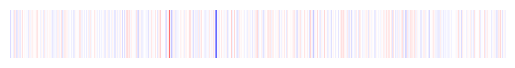

In [ ]:
import numpy as np


def display_vector_as_image(
    vector: np.ndarray,
    display_width: int = 100,
    colormap: str = "bwr",
    vmin=-0.25,
    vmax=0.25,
):
    N = len(vector)
    image = np.tile(vector.reshape((1, N)), (display_width, 1))
    plt.imshow(image, cmap=colormap, vmin=vmin, vmax=vmax)
    plt.axis("off")
    plt.show()


vector = np.array(result[0]["image_features"])
display_vector_as_image(vector.flatten())